<i>École Polytechnique de Montréal</i>
<br>
<i>Cours MTH2210 : Calcul scientifique pour ingénieurs</i>
<br>
<i>Session d'automne 2020</i>

<h1><center>TP 0 : Gabarit des TPs du cours MTH2210 et transciption Python de fonctions Matlab</center></h1>

| N'DRI Donatien    | BOUCHET Pierre-Yves |
|-------------------|---------------------|
| Matricule 9999999 | Matricule 0000000   |

In [1]:
#############################
# INITIALISATION DU GABARIT #
#############################



# La ligne suivante n'est à lancer que pour installer / mettre à jour la bibliothèque numérique du cours.
# Le reste du temps, elle peut rester commentée.
%pip install --upgrade git+https://github.com/amontoison/MTH2210.py.git



# Réinitialisation complète de l'environnement
%reset -f

# Import des bibliothèques nécessaires intégrées à Python
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

# Import de la bibliothèque numérique du cours
import MTH2210

# Définition d'un code permettant d'alléger le visuel du notebook; issu de
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Pour cacher/révéler le code brut (et donc n'avoir sur le notebook que les résultats), cliquer <a href="javascript:code_toggle()">ici</a>.''')

  Cloning https://github.com/amontoison/MTH2210.py.git to /tmp/pip-req-build-ims4lcts
Note: you may need to restart the kernel to use updated packages.


# EXERCICE 1

Le polynôme de Taylor de degré 4 de l'exponentielle $e^x$ au voisinage de 0 est
    $$ p_4(x) = 1+x+\frac{x^2}{2}+\frac{x^3}{6}+\frac{x^4}{24}. $$
Une autre approximation de l'exponentielle au voisinage de 0 est donnée par
    $$ r(x) = \frac{x^2+6x+12}{x^2-6x+12}. $$

a) Définir les fonction $x \mapsto p_4(x)$ et $x \mapsto r(x)$ en Python, dont l'utilisation est cohérente avec le format Numpy.

b) Tracer, sur un même graphique, les courbes des fonctions $x \mapsto e^x$, $x \mapsto p_4(x)$ et $x \mapsto r(x)$, sur l'intervalle $\left[\frac{-\ln{2}}{2},\frac{\ln{2}}{2}\right]$.

c) Tracer, sur un même graphique, les fonctions erreurs $x \mapsto e^x-p_4(x)$ et $x \mapsto e^x-r(x)$, sur l'intervalle $\left[\frac{-\ln{2}}{2},\frac{\ln{2}}{2}\right]$.

d) Commenter.

In [2]:
def p4(x):
    return(1 + x + x**2/2 + x**3/6 + x**4/24)

def r(x):
    return( (x**2+6*x+12) / (x**2-6*x+12) )

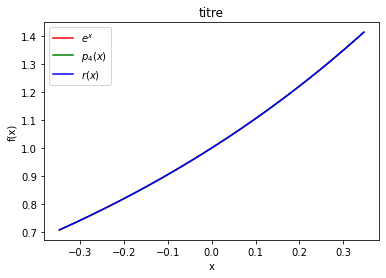

In [3]:
x = np.linspace(-np.log(2)/2, np.log(2)/2, 1000)

plt.plot(x, np.exp(x), color="r", label="$e^x$")
plt.plot(x, p4(x),     color="g", label="$p_4(x)$")
plt.plot(x, r(x),      color="b", label="$r(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("titre")
plt.legend()

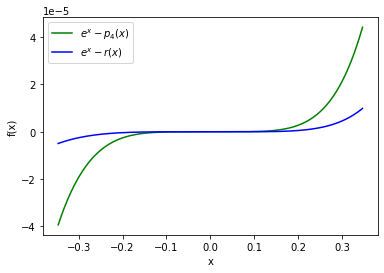

In [4]:
x = np.linspace(-np.log(2)/2, np.log(2)/2, 1000)

plt.plot(x, np.exp(x)-p4(x), color="g", label="$e^x-p_4(x)$")
plt.plot(x, np.exp(x)-r(x),  color="b", label="$e^x-r(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

La fonction $x \mapsto r(x)$ semble mieux approximer $x \mapsto e^x$ que le polynôme de Taylor $x \mapsto p_4(x)$. En effet, l'erreur commise par $r$ est constamment plus faible (plus proche de $0$) que celle commise par $p_4$. On notera cependant que pour les deux approximations, l'erreur est très faible au voisinage de l'origine.

# EXERCICE 2

Implémenter une fonction Python prenant en paramètres trois réels $a \neq 0$, $b$ et $c$, et renvoyant les deux racines du polynôme $ax^2 + bx + c$ dans un vecteur Numpy. S'il n'y a pas de racines réelles, renvoyer un vecteur de NaN. S'il y a une racine double, la placer deux fois dans le vecteur.

In [5]:
def roots(a,b,c):
    delta = b**2-4*a*c
    if delta < 0:
        return(np.array([np.nan, np.nan]))
    else:
        return(np.array([ (-b+np.sqrt(delta))/(2*a), (-b-np.sqrt(delta))/(2*a) ]))

# EXERCICE 3

Une façon possible de calculer la valeur de $\pi$ est de mesurer le périmètre d'un cercle de rayon $1/2$. On va utiliser cette remarque pour proposer une approximation de $\pi$ en approximant le périmètre du cercle $C = \left\{(x,y) \mid x^2+y^2 = \frac{1}{2}\right\}$.

Pour ce faire, on trace $P_n$ le polygône régulier à $2^n$ côtés inscrit dans $C$. Lorsque $n \rightarrow +\infty$, le polygône approche $C$ et son périmètre approche donc $\pi$. Pour $n=2$ par exemple, $P_2$ est le carré de sommets $\left(\frac{1}{2},0\right), \left(0,\frac{1}{2}\right), \left(\frac{-1}{2},0\right), \left(0,\frac{-1}{2}\right)$. Son périmètre est noté $p_2 = 2\sqrt{2}$.

De façon générale, on peut montrer qu'en notant $p_n$ le périmètre de $P_n$, on a la formule de récurrence
    $$r_3 = \frac{2}{2+\sqrt{2}},~ \forall n \geq 3,~ \left\{\begin{array}{rcl}
            r_{n+1} & = & \frac{r_n}{2+\sqrt{4-r_n}},\\
            p_{n+1} & = & 2^n\sqrt{r_{n+1}}.
       \end{array}\right. $$

a) Tracer, sur une même figure, $C$, $P_2$, $P_3$ et $P_4$.

b) Calculer $p_n$ pour $n$ allant de $4$ à $515$. Donner les résultats de $n=4$ à $n=30$ puis $n=520$ à $n=540$ dans un tableau formaté, indiquant également les valeurs des erreurs commises.

c) Donner le nombre de chiffres significatifs de $p_{15}$, $p_{24}$ et $p_{539}$.

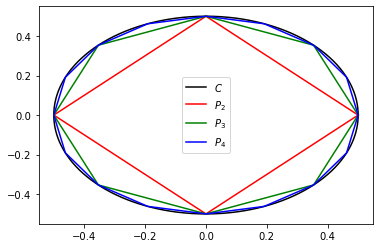

In [6]:
theta = np.linspace(0, 2*np.pi, 1000)

plt.plot(np.cos(theta)/2, np.sin(theta)/2, color="black", label="$C$")

colors = ["r","g","b"]
for n in [2,3,4]:
    k = 2**n
    x = [np.cos(2*np.pi*i/k)/2 for i in range(k+1)]
    y = [np.sin(2*np.pi*i/k)/2 for i in range(k+1)]
    plt.plot(x, y, color=colors[n-2], label="$P_{}$".format(n))

plt.legend()

In [7]:
r = [2 / (2+np.sqrt(2))]
p = []
print("  n || {:12} || {:^10}".format("p_n", "pi-p_n"))
print("----------------------------------")
for n in range(4,31):
    r.append( r[-1] / (2+np.sqrt(4-r[-1])) )
    p.append( 2**(n-1)*np.sqrt(r[-1]) )
    print("{:>3} || {:+10.9f} || {:+5.4e}".format(n, p[-1], np.pi-p[-1]))
for n in range(31,515):
    r.append( r[-1] / (2+np.sqrt(4-r[-1])) )
    p.append( 2**(n-1)*np.sqrt(r[-1]) )
print("----------------------------------")
for n in range(515,541):
    r.append( r[-1] / (2+np.sqrt(4-r[-1])) )
    p.append( 2**(n-1)*np.sqrt(r[-1]) )
    print("{:>3} || {:+10.9f} || {:+5.4e}".format(n, p[-1], np.pi-p[-1]))

  n || p_n          ||   pi-p_n  
----------------------------------
  4 || +3.121445152 || +2.0148e-02
  5 || +3.136548491 || +5.0442e-03
  6 || +3.140331157 || +1.2615e-03
  7 || +3.141277251 || +3.1540e-04
  8 || +3.141513801 || +7.8852e-05
  9 || +3.141572940 || +1.9713e-05
 10 || +3.141587725 || +4.9283e-06
 11 || +3.141591422 || +1.2321e-06
 12 || +3.141592346 || +3.0802e-07
 13 || +3.141592577 || +7.7005e-08
 14 || +3.141592634 || +1.9251e-08
 15 || +3.141592649 || +4.8128e-09
 16 || +3.141592652 || +1.2032e-09
 17 || +3.141592653 || +3.0080e-10
 18 || +3.141592654 || +7.5200e-11
 19 || +3.141592654 || +1.8800e-11
 20 || +3.141592654 || +4.6998e-12
 21 || +3.141592654 || +1.1751e-12
 22 || +3.141592654 || +2.9354e-13
 23 || +3.141592654 || +7.2831e-14
 24 || +3.141592654 || +1.7764e-14
 25 || +3.141592654 || +3.9968e-15
 26 || +3.141592654 || +4.4409e-16
 27 || +3.141592654 || -4.4409e-16
 28 || +3.141592654 || -4.4409e-16
 29 || +3.141592654 || -4.4409e-16
 30 || +3.141592654 |

In [8]:
n = [i for i in range(1,11)]
e1 = [1/ni for ni in n]
e2 = [1/ni**2 for ni in n]

print("  n || {:^16} || {:^10}".format("e1_n", "e2_n"))
for i in range(len(n)):
    print("{:>3} || {:+10.9e} || {:+5.4e}".format(i, e1[i], e2[i]))


  n ||       e1_n       ||    e2_n   
  0 || +1.000000000e+00 || +1.0000e+00
  1 || +5.000000000e-01 || +2.5000e-01
  2 || +3.333333333e-01 || +1.1111e-01
  3 || +2.500000000e-01 || +6.2500e-02
  4 || +2.000000000e-01 || +4.0000e-02
  5 || +1.666666667e-01 || +2.7778e-02
  6 || +1.428571429e-01 || +2.0408e-02
  7 || +1.250000000e-01 || +1.5625e-02
  8 || +1.111111111e-01 || +1.2346e-02
  9 || +1.000000000e-01 || +1.0000e-02


blabla de commentaire

L'erreur commise à $n=15$ est de $4.8128e-09$, soit directement inférieure à $0.5e-8$. Il y a donc $8$ chiffres significatifs dans les décimales, soit $9$ chiffres significatifs au total.

De même, à $n=24$ on a $14$ chiffres significatifs dans les décimales, donc $15$ au total.

Enfin, à $n=539$ il n'y a plus aucun chiffre significatif.

# Utilisation de la bibliothèque numérique Python

In [9]:
############################
# Méthode de la bissection #
############################

help("MTH2210.bissection")

print("\n\n\n")
print("x, f = MTH2210.bissection(lambda x : x, -0.5, 1/3) :\n")
x, f = MTH2210.bissection(lambda x : x, -0.5, 1/3)
print("x =", x)
print("f =", f)

Help on function bissection in MTH2210:

MTH2210.bissection = bissection(f, x0, x1, nb_iter=100, tol_rel=1e-08, tol_abs=1e-08, output='')
    Méthode de recherche d'une racine de la fonction f via la méthode de la bissection :
        - x_g et x_d donnés, vérifiant f(x_g)*f(x_d) < 0, et x_c = (x_g+x_d)/2 et f(x_c),
        - si f(x_c) = 0, on a trouvé la racine,
        - si f(x_g)*f(x_c) < 0, alors la méthode est relancée avec x_g inchangé et x_d = x_c,
        - si f(x_c)*f(x_d) < 0, alors la méthode est relancée avec x_g = x_c et x_d inchangé,
        - à chaque itération k, le point noté x_k est x_c.
    
    Les arguments attendus sont :
        - une fonction f, admettant en entrée un scalaire x et renvoyant un scalaire f(x),
        - deux scalaires x0 et x1 (de type int, float ou np.float64), les bornes de l'intervalle de recherche contenant la racine à localiser.
    
    Les arguments optionnels sont :
        - un entier nb_iter défiinissant le nombre maximal d'itérations al

In [10]:
############################
#  Méthode de la sécante   #
############################

help("MTH2210.secante")

print("\n\n\n")
print("x, f, d = MTH2210.secante(lambda x :x**2, 2, 1) :\n")
x, f, d = MTH2210.secante(lambda x :x**2, 2, 1)
print("x =", x)
print("f =", f)
print("d =", d)

Help on function secante in MTH2210:

MTH2210.secante = secante(f, x0, x1, nb_iter=100, tol_rel=1e-08, tol_abs=1e-08, output='')
    Méthode de recherche d'une racine de la fonction scalaire f via la méthode de la sécante :
        - x_0 et x_1 donnés,
        - d_k = (f(x_k)-f(x_km1)) / (x_k-x_km1),
        - x_kp1 = x_k - f(x_k) / d_k.
    
    Les arguments attendus sont :
        - une fonction f, admettant en entrée un scalaire x et renvoyant un scalaire f(x),
        - deux scalaires x0 et x1 (de type int, float ou np.float64), points de départ de la méthode itérative.
    
    Les arguments optionnels sont :
        - un entier nb_iter défiinissant le nombre maximal d'itérations allouées à la méthode,
        - un réel tol_rel définissant la condition d'arrêt abs(x_k-x_km1) / (abs(x_k)+eps) <= tol_rel,
        - un réel tol_abs définissant la condition d'arrêt abs(f(x_k)) <= tol_abs,
        - une chaîne de caractères output qui renvoie les affichages de la fonction vers :
     

In [11]:
############################
#   Méthode de Newton 1D   #
############################

help("MTH2210.newton_1d")

print("\n\n")
print("x, f, d = MTH2210.newton_1d(lambda x : np.sin(x), lambda x:np.cos(x), 1) :\n")
x, f, d = MTH2210.newton_1d(lambda x : np.sin(x), lambda x:np.cos(x), 1)
print("x =", x)
print("f =", f)
print("d =", d)

Help on function newton_1d in MTH2210:

MTH2210.newton_1d = newton_1d(f, df, x0, nb_iter=100, tol_rel=1e-08, tol_abs=1e-08, output='')
    Méthode de recherche d'une racine de la fonction scalaire f via la méthode de Newton :
        - x_0 donné,
        - x_kp1 = xk - f(xk)/f'(xk).
    
    Les arguments attendus sont :
        - une fonction  f, admettant en entrée un scalaire x et renvoyant un scalaire f(x),
        - une fonction df, admettant en entrée un scalaire x et renvoyant un scalaire f'(x),
        - un scalaire  x0 (de type int, float ou np.float64), point de départ de la méthode itérative.
    
    Les arguments optionnels sont :
        - un entier nb_iter définissant le nombre maximal d'itérations allouées à la méthode,
        - un réel   tol_rel définissant la condition d'arrêt abs(x_k-x_km1) / (abs(x_k)+eps) <= tol_rel,
        - un réel   tol_abs définissant la condition d'arrêt abs(f(x_k)) <= tol_abs,
        - une chaîne de caractères output qui renvoie les affich

In [12]:
############################
#   Méthode de Newton nD   #
############################

help("MTH2210.newton_nd")

print("\n\n")
print("x, f = MTH2210.newton_nd(lambda x:x**2, np.array([1,1,1])) :\n")
x, f, d = MTH2210.newton_nd(lambda x:x**2, np.array([1,1,1]))
print("x =", x)
print("f =", f)
print("d =", d)

Help on function newton_nd in MTH2210:

MTH2210.newton_nd = newton_nd(f, x0, nb_iter=100, tol_rel=1e-08, tol_abs=1e-08, output='')
    Méthode de recherche d'une racine de la fonction vectorielle f via la méthode de Newton avec approximation de la jacobienne :
        - x_0 donné,
        - x_kp1 = xk - Jac(f)(x_k)^-1*f(x_k).
    
    Les arguments attendus sont :
        - une fonction  f, admettant en entrée un vecteur x et renvoyant un vecteur f(x),
        - un scalaire  x0 (de type int, float ou np.float64), point de départ de la méthode itérative.
    
    Les arguments optionnels sont :
        - un entier nb_iter définissant le nombre maximal d'itérations allouées à la méthode,
        - un réel   tol_rel définissant la condition d'arrêt abs(x_k-x_km1) / (abs(x_k)+eps) <= tol_rel,
        - un réel   tol_abs définissant la condition d'arrêt abs(f(x_k)) <= tol_abs,
        - une chaîne de caractères output qui renvoie les affichages de la fonction vers :
            - la sortie 

In [13]:
############################
# Recherche du point fixe  #
############################

help("MTH2210.point_fixe")

print("\n\n")
print("cas x de dim 1 : x = MTH2210.point_fixe(lambda x :x**2, 0.5) :\n")
x = MTH2210.point_fixe(lambda x :x**2, 0.5)
print("x =", x)

print("\n\n")

print("cas x de dim > 1 : x = MTH2210.point_fixe(lambda x : x**2, np.array([0.1,0.1])) :\n")
x = MTH2210.point_fixe(lambda x : x**2, np.array([0.1,0.1]))
print("x =", x)

Help on function point_fixe in MTH2210:

MTH2210.point_fixe = point_fixe(f, x0, nb_iter=100, tol_rel=1e-08, tol_abs=1e-08, output='')
    Méthode de calcul d'un point fixe x=f(x) par méthode itérative :
        - x_0 donné,
        - x_kp1 = f(x_k).
    
    Les arguments attendus sont :
        - une fonction f, admettant en entrée un vecteur x, renvoyant un vecteur f(x) de même dimension que x,
        - un vecteur x0, point de départ de la méthode itérative.
    
    Les arguments optionnels sont :
        - un entier nb_iter défiinissant le nombre maximal d'itérations allouées à la méthode,
        - un réel tol_rel définissant la condition d'arrêt e_k = norm(x_k-x_km1) / (norm(x_k)+eps) <= tol_rel,
        - un réel tol_abs définissant la condition d'arrêt norm(f(x_k)-x_k) <= tol_abs,
        - une chaîne de caractères output qui renvoie les affichages de la fonction vers :
            - la sortie standard si output = "",
            - un fichier ayant pour nom+extension output (l

In [14]:
############################
#  Interpolation Lagrange  #
############################

help("MTH2210.lagrange")

print("\n\n")
print("y, l = MTH2210.lagrange([-1,0,1], [0,-1,0], [-2,-1,-0.5,0,0.5,1,2]) :\n")
y, l = MTH2210.lagrange([-1,0,1], [0,-1,0], [-2,-1,-0.5,0,0.5,1,2])
print("y =", y)
print("l =", l)
print("La fonction l s'utilise comme suit :")
print("l(5) =", l(5))
print("l(np.array([5,10,100])) =", l(np.array([5,10,100])))

Help on function lagrange in MTH2210:

MTH2210.lagrange = lagrange(x, y, x_e, output='')
    Calcul du polynôme d'interpolation de Lagrange passant par tous les points (x_k,y_k) donnés en paramètres x et y :
        - pour tout z, Lagrange(x,y)(z) = somme(j)(  y_j * prod(i)((x_i-z)/(x_i-x_j))  ).
    
    Les arguments attendus sont :
        - un vecteur   x, contenant les abscisses des points d'interpolation,
        - un vecteur   y, contenant les ordonnées des points d'interpolation,
        - un vecteur x_e, contenant les abscisses des points auxquels le polynôme d'interpolation sera évalué.
    
    L'argument optionnel est :
        - une chaîne de caractères output qui renvoie les affichages de la fonction vers :
            - la sortie standard si output = "",
            - un fichier ayant pour nom+extension output (le paramètre doit donc contenir l'extension voulue, et le chemin d'accès doit exister),
            - nul part (aucune information écrite ni sauvegardée) si outpu

In [15]:
############################
# Interpolation spline cub #
############################

help("MTH2210.spline_cub")

print("\n\n")
print("Cas par défaut, spline naturelle : y, s = MTH2210.spline_cub([-1,0,1], [0,-1,0], [-2,-1,-0.5,0,0.5,1,2]) :\n")
y, s = MTH2210.spline_cub([-1,0,1], [0,-1,0], [-2,-1,-0.5,0,0.5,1,2])
print("y =", y)
print("s =", s)
print("La fonction s s'utilise comme suit :")
print("s(5) =", s(5))
print("s(np.array([5,10,100])) =", s(np.array([5,10,100])))

print("\n\n")
print("Les autres cas s'obtiennent via les paramètres optionnels cond_g, val_g, cond_d, val_d :")
print("MTH2210.spline_cub(x, y, x_e, cond_g, val_g, cond_d, val_d)")
y, s = MTH2210.spline_cub([-1,0,1], [0,-1,0], [-2,-1,-0.5,0,0.5,1,2], 1, 0.5)

Help on function spline_cub in MTH2210:

MTH2210.spline_cub = spline_cub(x, y, x_e, cond_g=0, val_g=0, cond_d=0, val_d=0, output='')
    Calcul d'une spline cubique d'interpolation de tous les points (x_k,y_k) donnés en paramètres x et y.
    
    Les arguments attendus sont :
        - un vecteur x, contenant les abscisses des points d'interpolation,
    
        - un vecteur y, contenant les ordonnées des points d'interpolation,
    
        - un vecteur x_e, contenant les abscisses des points auxquels le polynôme d'interpolation sera évalué.
    
    Les arguments optionnels sont :
        - un entier cond_g dans [0,1,2,3], déterminant la condition à gauche (défaut = 0) :
            - cond_g = 0 impose la condition naturelle à gauche,
            - cond_g = 1 impose à la courbure à gauche de valoir val_g,
            - cond_g = 2 impose à la courbure d'être constante à gauche,
            - cond_g = 3 impose à la pente à gauche de valoir val_g,
        - un réel val_g, utilisé dans

In [16]:
############################
# Méthode d'approx d'Euler #
############################

help("MTH2210.euler")

print("\n\n")
print("cas x de dim 1 : x, t = MTH2210.euler(lambda x,t : np.cos(t), 0, 0, 2*np.pi, 10) :\n")
x, t = MTH2210.euler(lambda x,t : np.cos(t), 0, 0, 2*np.pi, 10)
print("x =", x)
print("t =", t)

print("\n\n")
print("cas x de dim > 1 : x, t = MTH2210.euler(lambda x,t : np.array([np.cos(t),np.sin(t)]), np.array([0,0]), 0, 2*np.pi, 10) :\n")
x, t = MTH2210.euler(lambda x,t : np.array([np.cos(t),np.sin(t)]), np.array([0,0]), 0, 2*np.pi, 10)
print("x =", x)
print("t =", t)

Help on function euler in MTH2210:

MTH2210.euler = euler(f, x0, t0, tm, m, output='')
    Méthode de résolution numérique d'une équation (dx/dt)(t) = f(x(t),t) par le schéma d'Euler :
        - x_0 donné, t_0 donné, pas de temps h donné,
        - x_kp1 = x_k + h*f(x_k,t_k),
        - t_kp1 = t_k + h.
    
    Les arguments attendus sont :
        - une fonction f, admettant en entrée un vecteur x et un réel t, renvoyant un vecteur f(x,t),
        - un vecteur  x0, condition initiale de l'équation,
        - deux réels  t0 et tm, les bornes de l'intervalle de temps sur lequel l'équation est appliquée,
        - un entier    m, le pas de discrétisation de [t0,tm], définissant donc h = (tm-t0)/m.
    
    L'argument optionnel est une chaîne de caractères output qui renvoie les affichages de la fonction vers :
        - la sortie standard si output = "",
        - un fichier ayant pour nom+extension output (le paramètre doit donc contenir l'extension voulue, et le chemin d'accès doit exi

In [17]:
############################
# Méthode d'approx via RK4 #
############################

help("MTH2210.rk4")

print("\n\n")
print("cas x de dim 1 : x, t = MTH2210.rk4(lambda x,t : np.cos(t), np.float64(0), 0, 2*np.pi, 10) :\n")
x, t = MTH2210.rk4(lambda x,t : np.cos(t), np.float64(0), 0, 2*np.pi, 10)
print("x =", x)
print("t =", t)

print("\n\n")
print("cas x de dim > 1 : x, t = MTH2210.rk4(lambda x,t : np.array([np.cos(t),np.sin(t)]), np.array([0,0]), 0, 2*np.pi, 10) :\n")
x, t = MTH2210.rk4(lambda x,t : np.array([np.cos(t),np.sin(t)]), np.array([0,0]), 0, 2*np.pi, 10)
print("x =", x)
print("t =", t)

Help on function rk4 in MTH2210:

MTH2210.rk4 = rk4(f, x0, t0, tm, m, output='')
    Méthode de résolution numérique d'une équation (dx/dt)(t) = f(x(t),t) par le schéma de Runge-Kutta d'ordre 4 :
        - x_0 donné, t_0 donné, pas de temps h donné,
        - y_k^1 = f(x_k          , t_k    ),
        - y_k^2 = f(x_k+y_k^1*h/2, t_k+h/2),
        - y_k^2 = f(x_k+y_k^2*h/2, t_k+h/2),
        - y_k^4 = f(x_k+y_k^3*h  , t_k+h  ),
        - x_kp1 = x_k + (y_k^1+2y_k^2+3y_k^3+y_k^4)*h/6,
        - t_kp1 = t_k + h.
    
    Les arguments attendus sont :
        - une fonction f, admettant en entrée un vecteur x et un réel t, renvoyant un vecteur f(x,t),
        - un vecteur x0, condition initiale de l'équation,
        - deux réels t0 et tm, les bornes de l'intervalle de temps sur lequel l'équation est appliquée,
        - un entier m, le pas de discrétisation de [t0,tm], définissant donc h = (tm-t0)/m.
    
    L'argument optionnel est une chaîne de caractères output qui renvoie les affichag

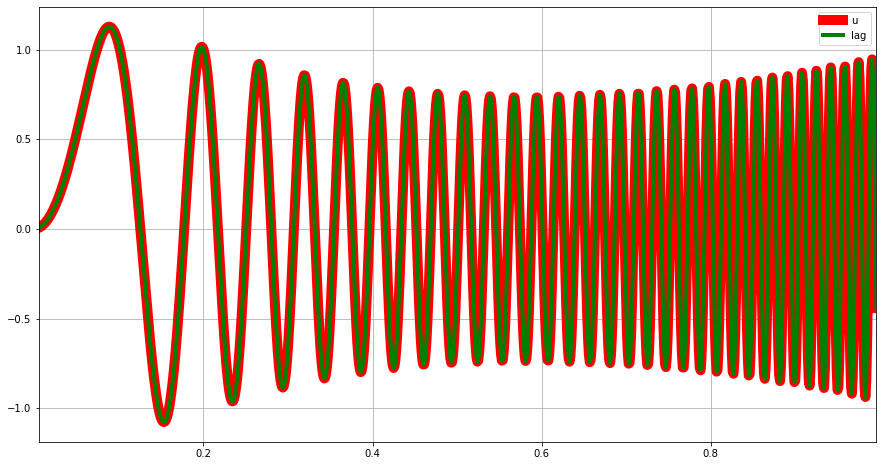

In [18]:
u = lambda x: (np.exp(3*x) * np.sin(200*x**2)) / (1+20*x**2)

xu = np.linspace(0,1,1001)
yu = [u(i) for i in xu]

n = 200
pt = n+1

x200 = np.linspace(0,1,pt)
u_x200 = [u(i) for i in x200]

#yu, l200 = MTH2210.lagrange(x200, u_x200, xu, output="None")

plt.figure(figsize=(15,8))
plt.plot(xu,yu, "r", lw=10)
plt.plot(xu, yu, "g", lw=4)
plt.grid()
plt.xlim((0.005,0.995))
plt.legend(["u","lag"])
plt.show()

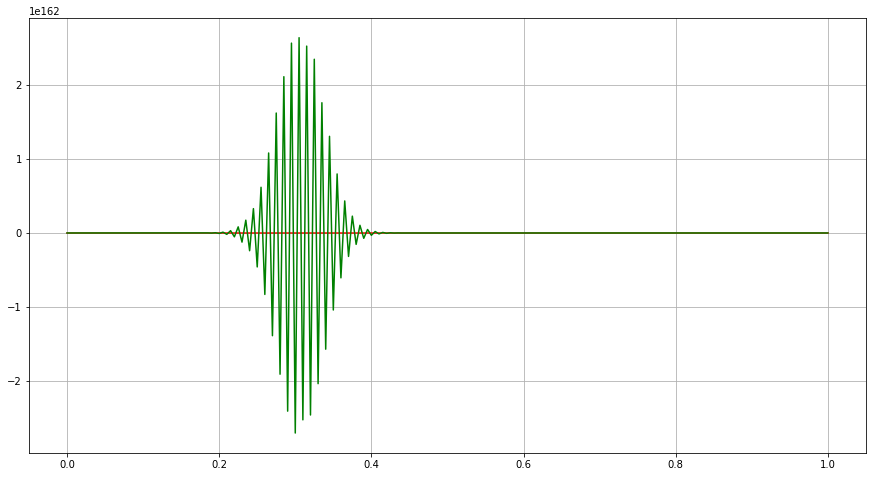

In [19]:
import scipy.interpolate as spi

u = lambda x: (np.exp(3*x) * np.sin(200*x**2)) / (1+20*x**2)

xu = np.linspace(0,1,1001)
yu = [u(i) for i in xu]

n = 200
pt = n+1

x200 = np.linspace(0,1,pt)
u_x200 = [u(i) for i in x200]

y200 = spi.lagrange(x200, u_x200)

plt.figure(figsize=(15,8))
plt.plot(xu,yu, "r")
plt.plot(x200, y200, "g")
plt.grid()
plt.show()

In [20]:
xi = [0,1,2]
yi = [0,-1,0]
x  = np.linspace(0,2,11)

def repmat(Mat,M,N):
    couple1 = [Mat for i in range(M)]
    tmp = np.concatenate(couple1,axis=0)
    couple2 = [tmp for i in range(N)]
    out = np.concatenate(couple2,axis=1)
    return(out)

def prod(Mat):
    return(np.array([np.prod(Mat[:,i]) for i in range(Mat.shape[1])]))

M = len(xi)
N = len(x)

Xi = repmat(xi,1,M)
W = repmat(1/prod(Xi-np.transpose(Xi)+np.eye(M)),N,1)
xdist = repmat(x,1,M)-repmat(np.transpose(xi),N,1)

ijzeros = np.where(xdist == 0)
ijzeros = [[ijzeros[0][i],ijzeros[1][i]] for i in range(len(ijzeros[0]))]
for ij in ijzeros:
    xdist[ij[0],ij[1]] = float("Inf")
H = W/xdist

Lx = (H*yi)/sum(H,2)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
x = np.array([1,2,3])
y = np.array([[xi for i in range(5)] for xi in x])
np.transpose(y)

In [ ]:
np.eye(3)

In [ ]:
1/x

In [ ]:
np.prod(x)

In [ ]:
x = np.array([[1,2,3],[4,5,6]])
x
np.prod(x)

In [ ]:
xdist

In [ ]:
np.where(xdist == 0)

In [ ]:
np.sum(H,2)

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a

In [ ]:
prod(a)